In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
!nvidia-smi

Sun Aug  6 14:52:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    23W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.9/606.9 kB 7.2 MB/s eta 0:00:00


In [4]:
# Import YOLO from Ultralytics
from ultralytics import YOLO

# Import display function
from IPython.display import display, Image

In [5]:
#Unzip the dataset folder
!unzip -uq /content/drive/MyDrive/Face-Detection-Dataset.zip

In [6]:
# Create an instance of the YOLO class and load the pre-trained YOLOv8l model ('yolov8l.pt')
model= YOLO('yolov8l.pt')

100%|██████████| 83.7M/83.7M [00:00<00:00, 253MB/s]


In [9]:
#train the model
model.train(data= '/content/Face-Detection-Dataset/data.yaml', epochs= 25)

Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/Face-Detection-Dataset/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fal

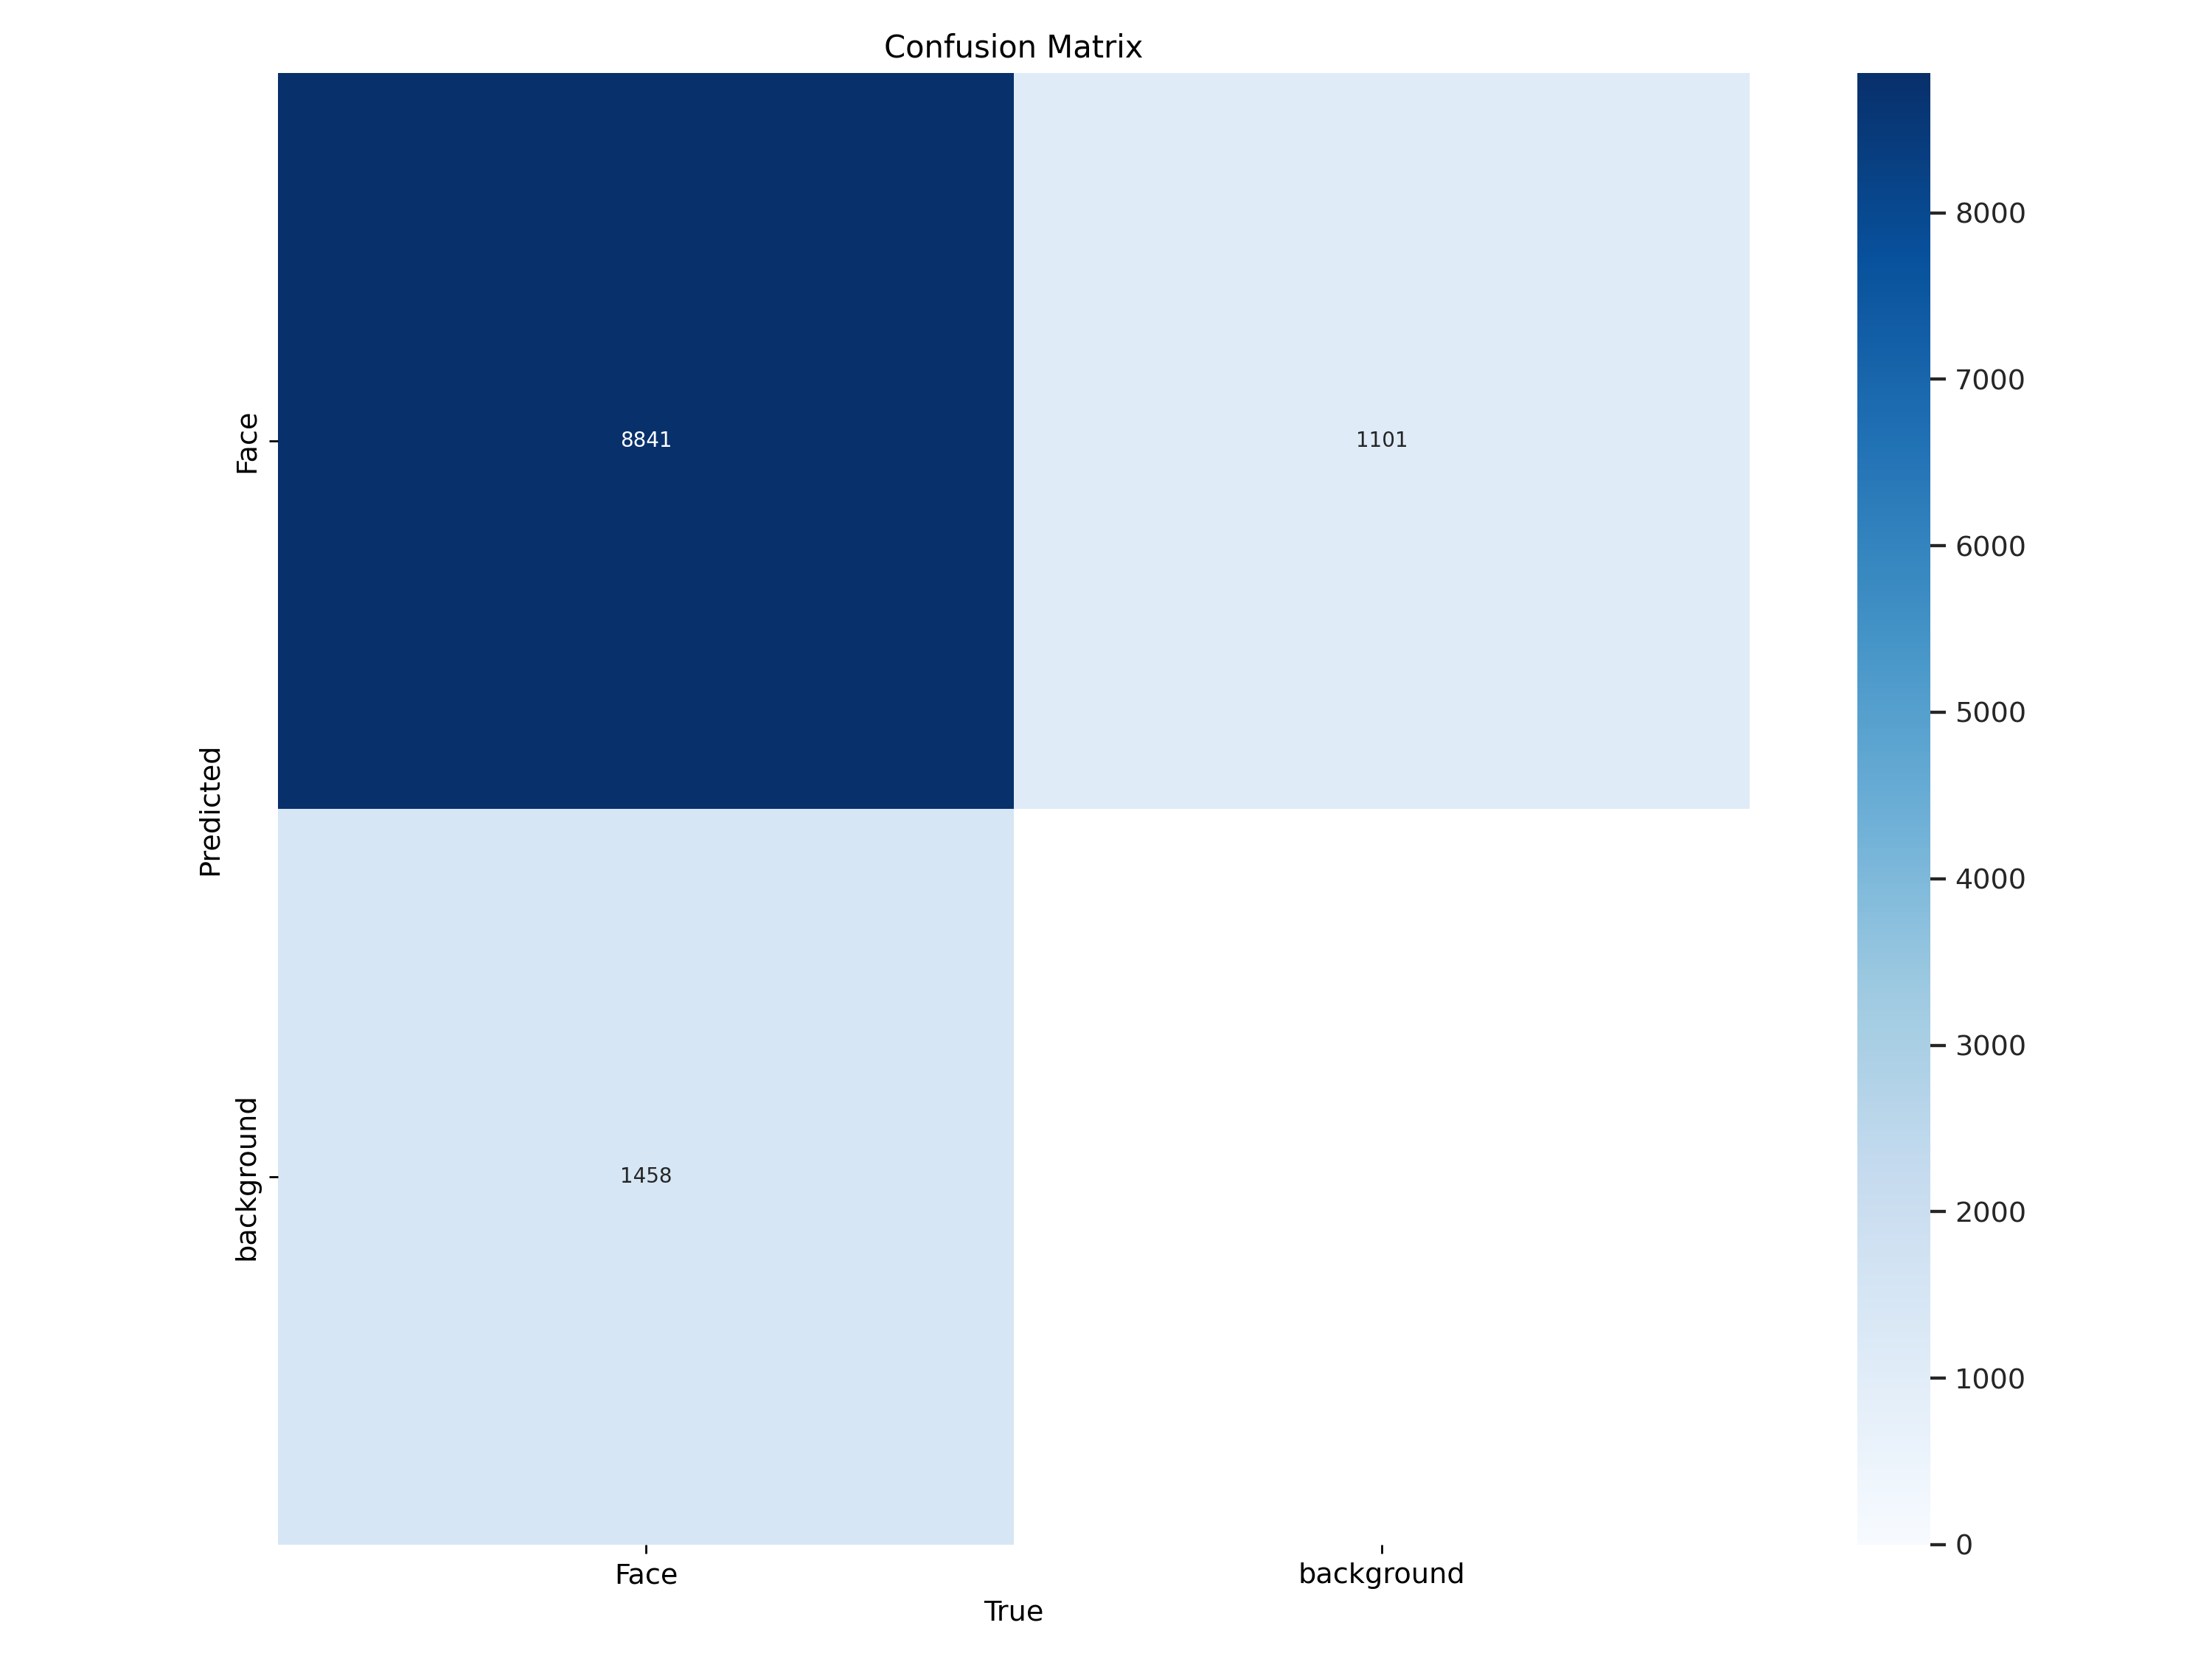

In [10]:
# display confusion matrix
Image(filename="/content/runs/detect/train3/confusion_matrix.png", width= 800)

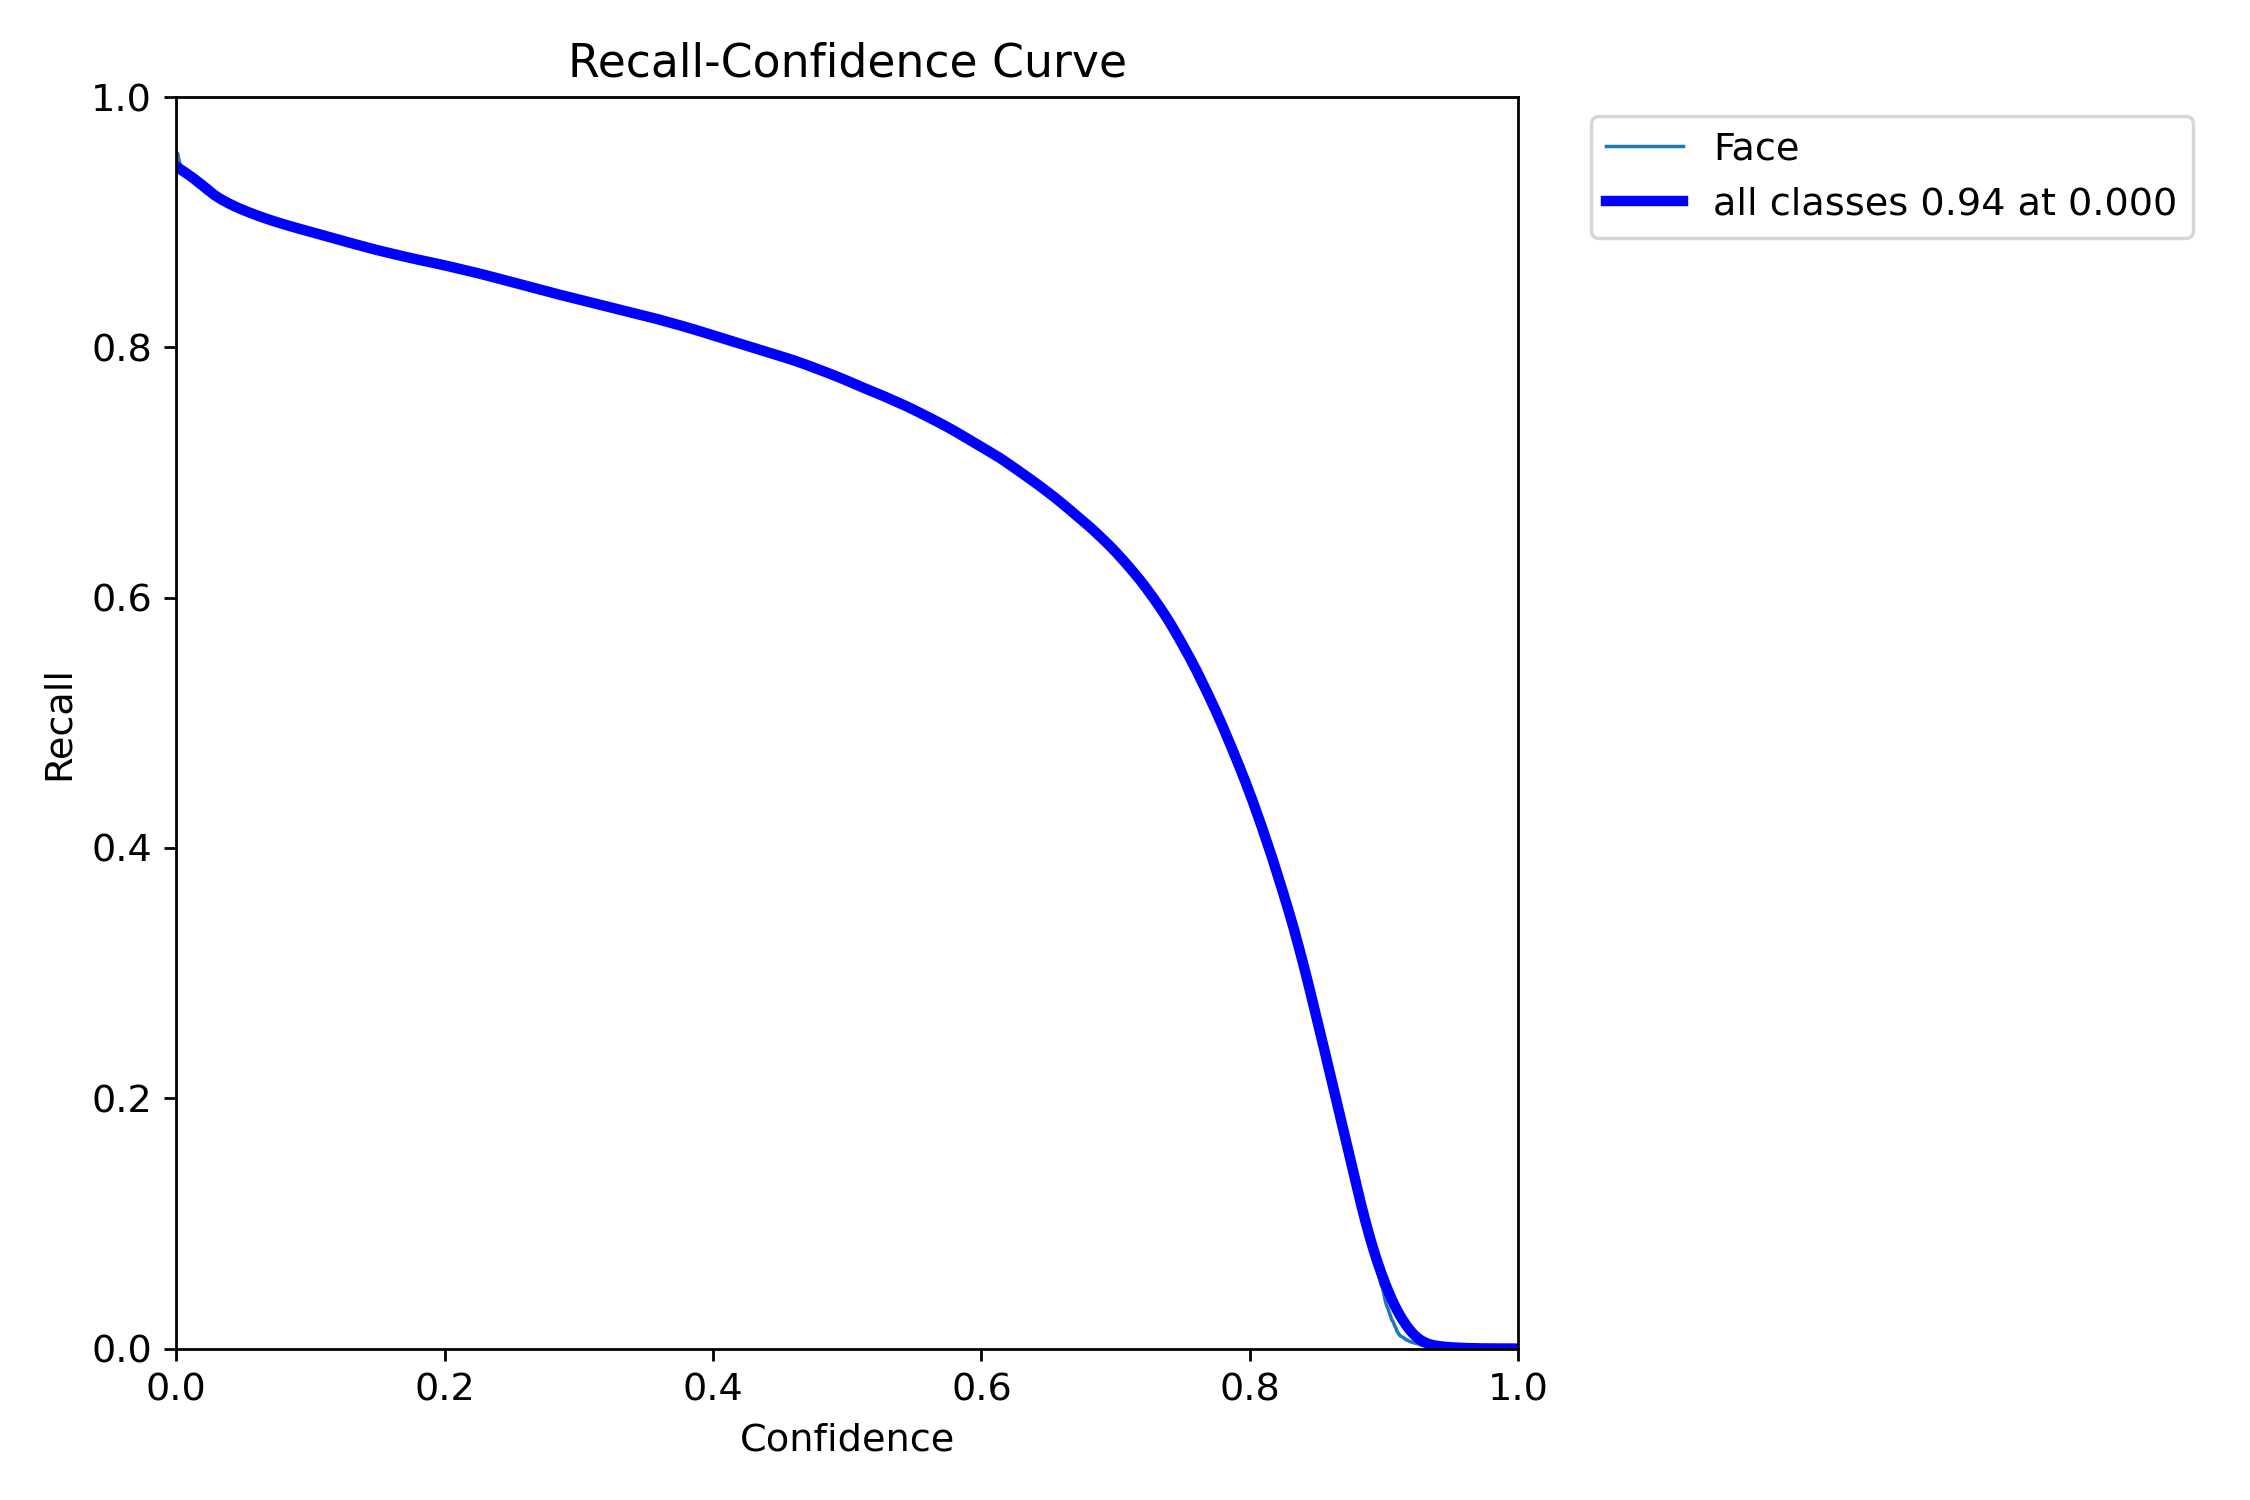

In [11]:
# display R_curve
Image(filename="/content/runs/detect/train3/R_curve.png", width= 800)

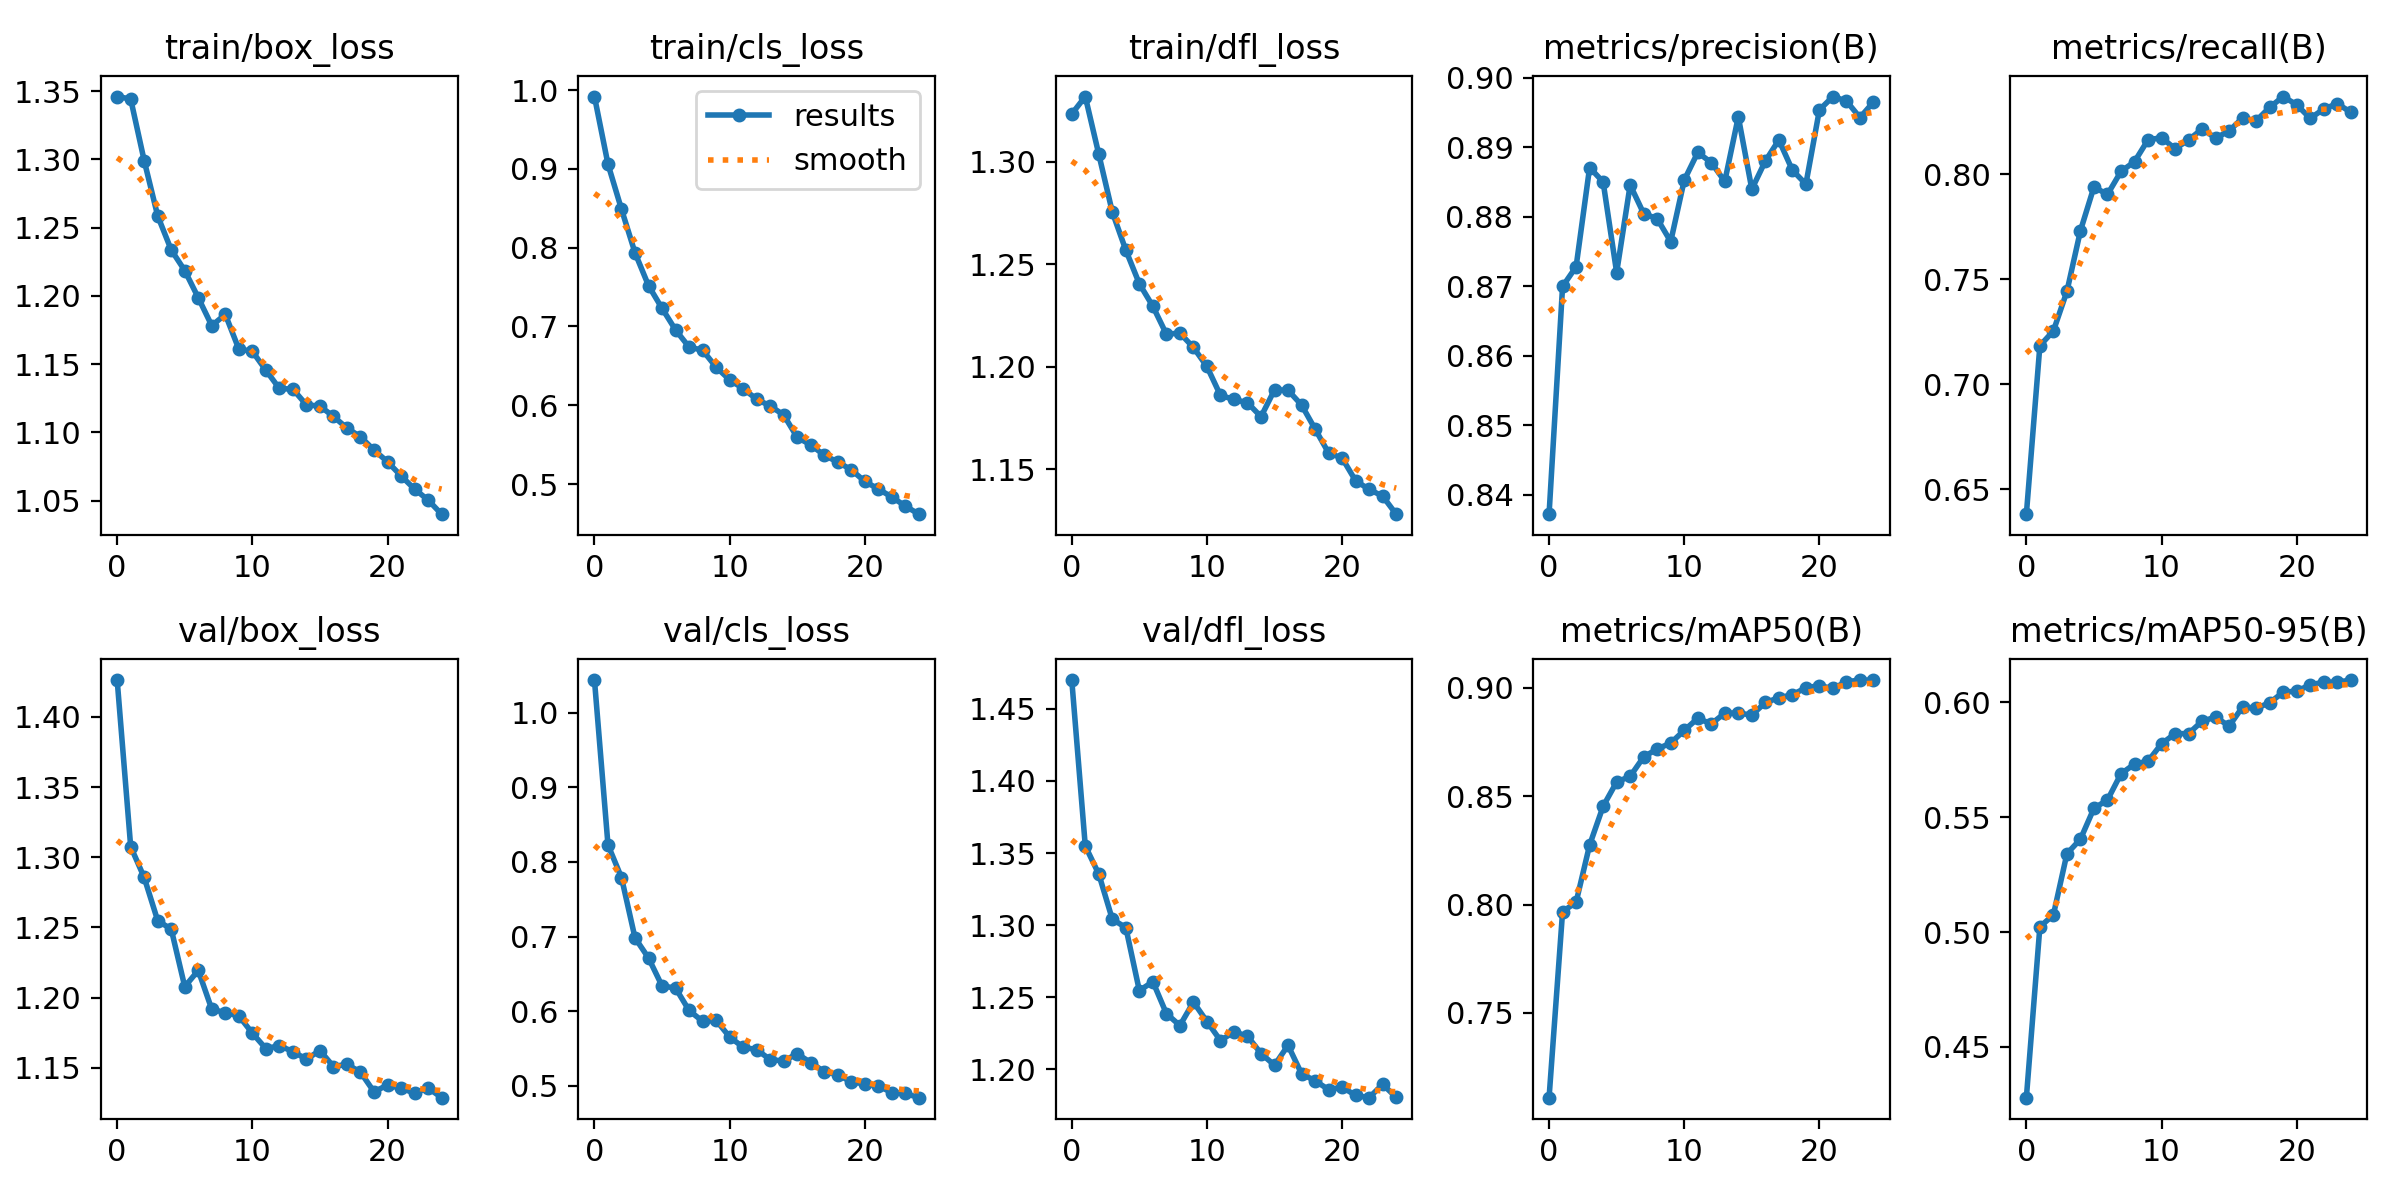

In [12]:
# display results
Image(filename="/content/runs/detect/train3/results.png", width= 800)

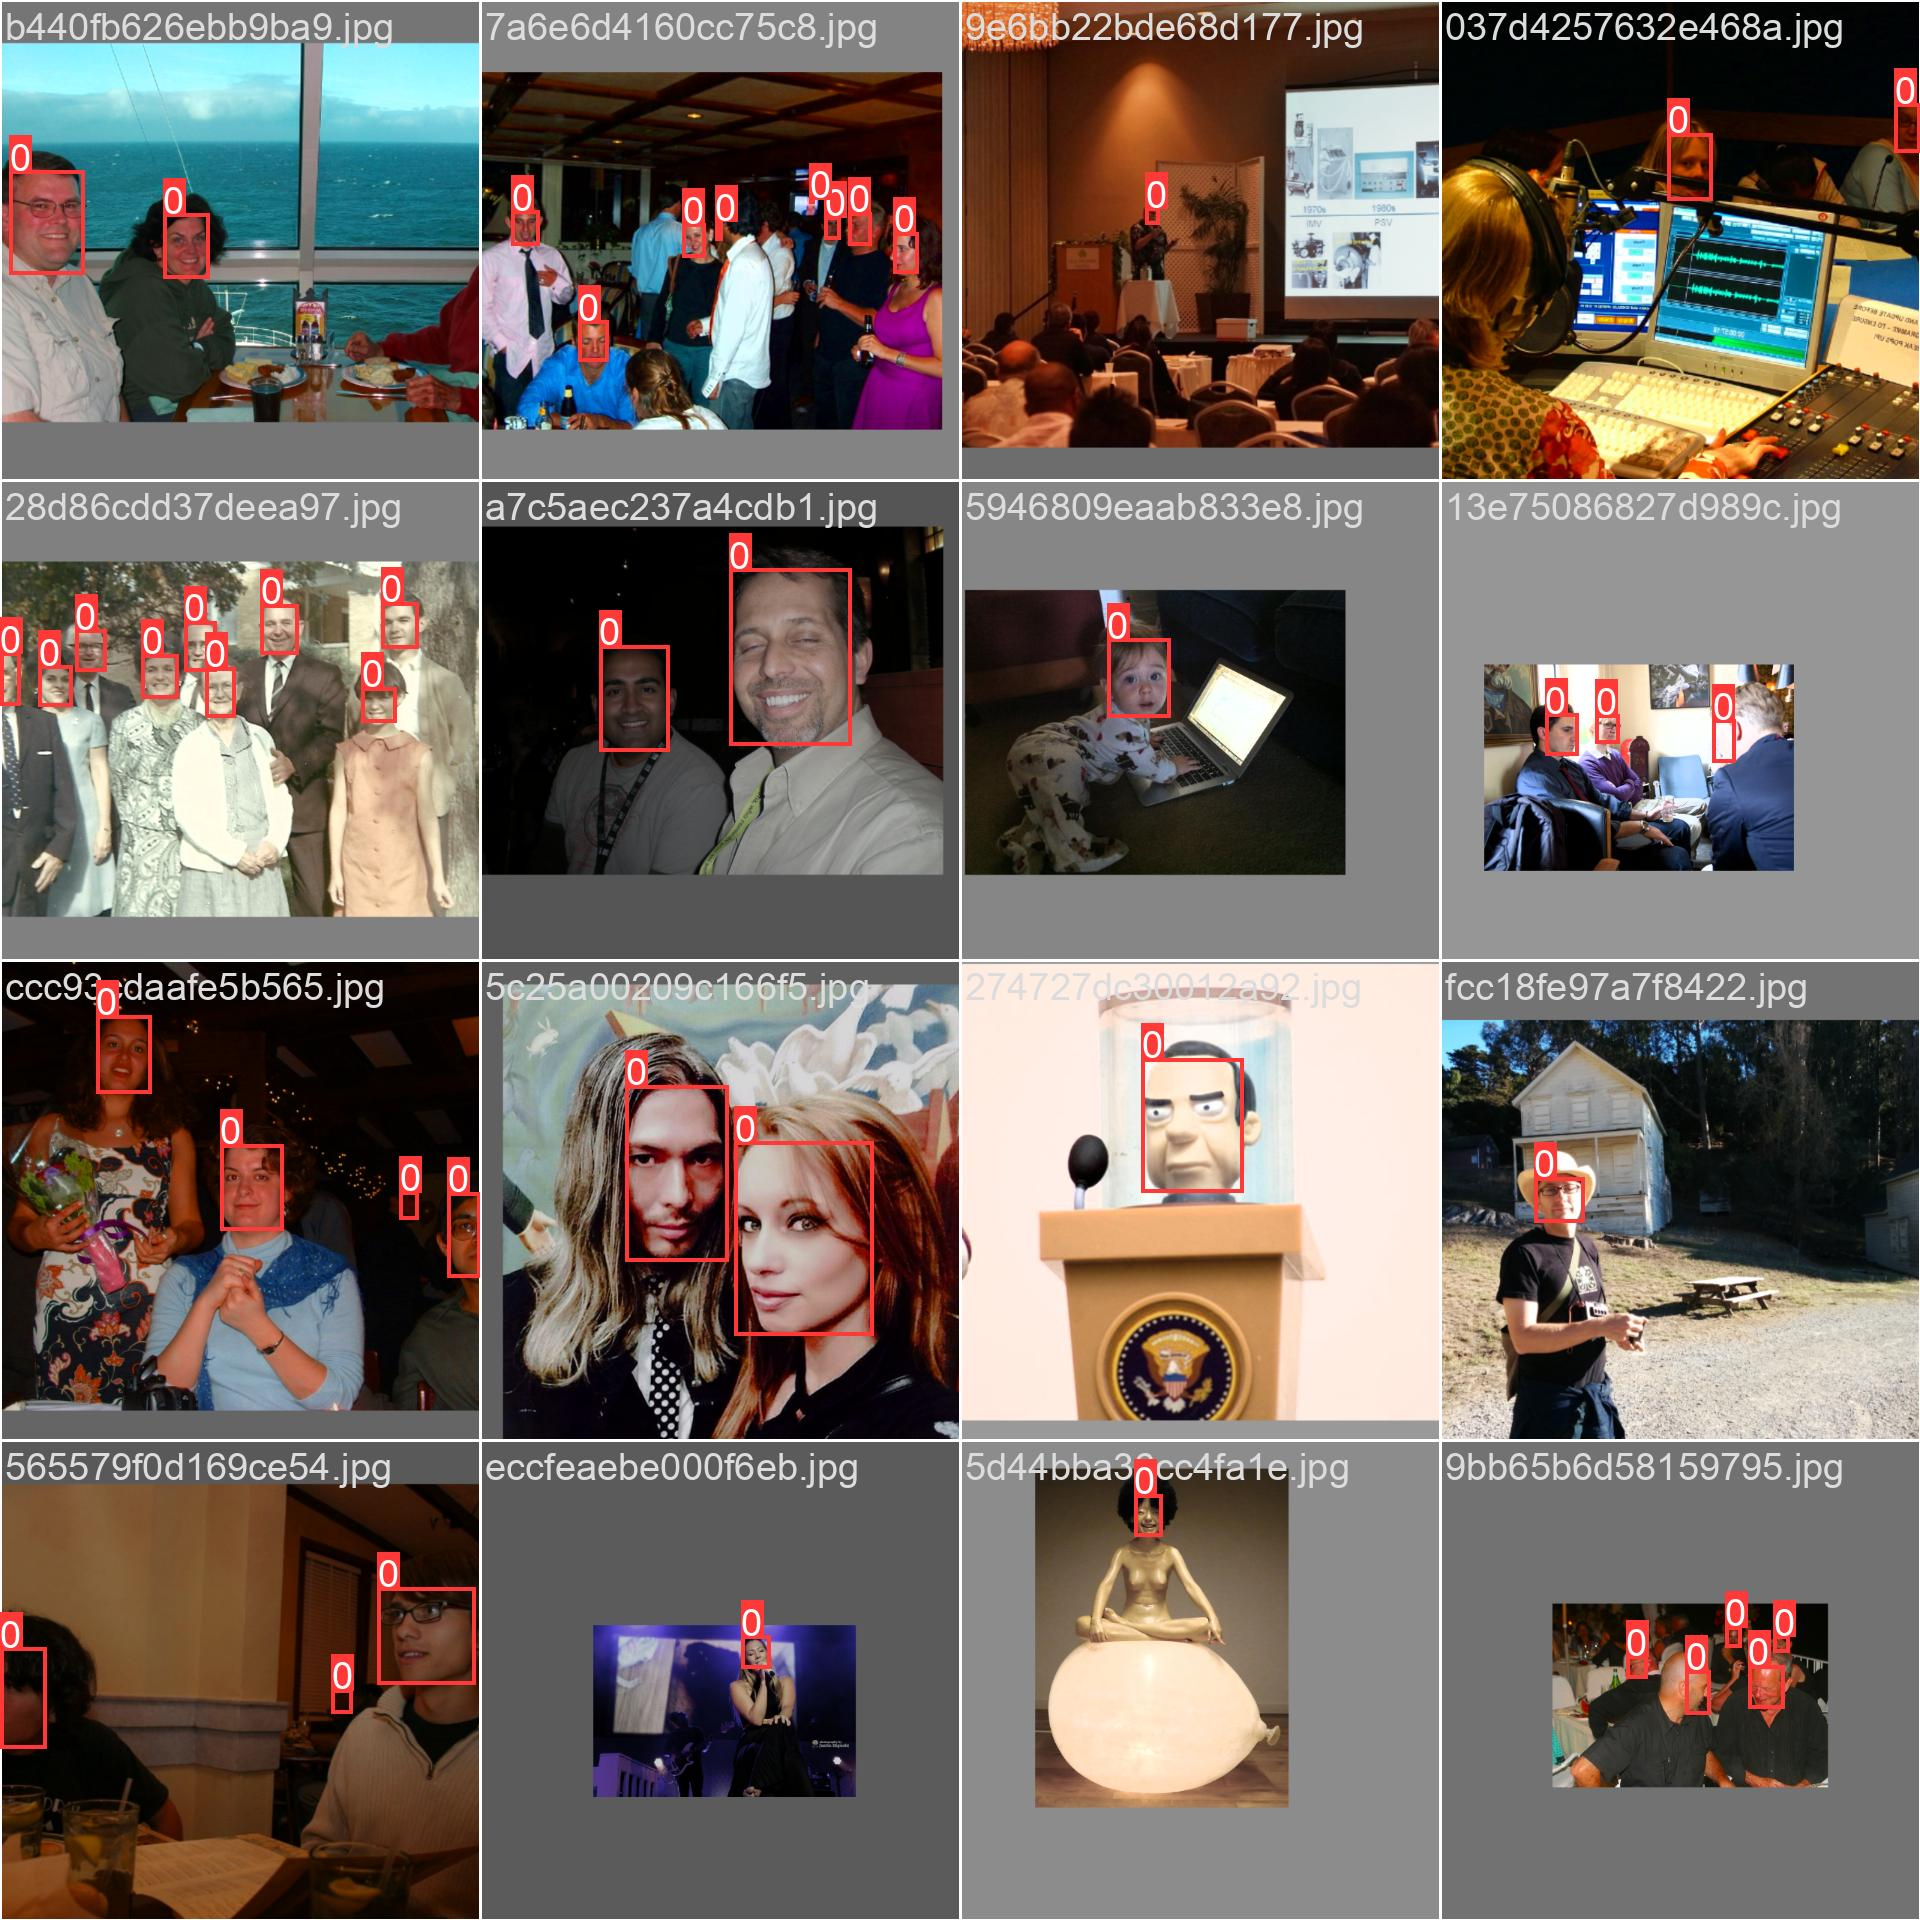

In [16]:
# display batch predictions
Image(filename="/content/runs/detect/train3/train_batch12557.jpg", width= 800)

In [17]:
# Validate the model
metrics= model.val()

Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients
val: Scanning /content/Face-Detection-Dataset/val/labels.cache... 3347 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3347/3347 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 210/210 [01:59<00:00,  1.76it/s]
                   all       3347      10299      0.897      0.829      0.904       0.61
Speed: 0.3ms preprocess, 8.6ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val
